# AI in Industry Project  
## Predicting Road Accident Risk (Kaggle Playground Series S5E10)

**Student:** *[Lukas Wijk & Brage Vik]*  
**Course:** AI in Industry  
**Goal:** Use machine learning to predict the likelihood of road accidents using the provided dataset.




In [2]:
# Setup

import util
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


figsize=(16, 5)

# A look at the data

The dataset contains road accident data with various features and a target variable indicating accident risk.

In [3]:
# Import and load data
train = util.load_data("../data/train.csv")
test = util.load_data("../data/test.csv")

print("Training data shape:", train.shape)
print("Test data shape:", test.shape)
print("\nTraining data info:")
print(train.describe(include="all"))
print(f"missing training values: {train.isnull().sum().sum()}")
print(f"missing test values: {test.isnull().sum().sum()}")

Training data shape: (517754, 14)
Test data shape: (172585, 13)

Training data info:
                   id road_type      num_lanes      curvature    speed_limit  \
count   517754.000000    517754  517754.000000  517754.000000  517754.000000   
unique            NaN         3            NaN            NaN            NaN   
top               NaN   highway            NaN            NaN            NaN   
freq              NaN    173672            NaN            NaN            NaN   
mean    258876.500000       NaN       2.491511       0.488719      46.112575   
std     149462.849975       NaN       1.120434       0.272563      15.788521   
min          0.000000       NaN       1.000000       0.000000      25.000000   
25%     129438.250000       NaN       1.000000       0.260000      35.000000   
50%     258876.500000       NaN       2.000000       0.510000      45.000000   
75%     388314.750000       NaN       3.000000       0.710000      60.000000   
max     517753.000000       NaN    

The fourteen columns consits of a unique id for each road, 12 input(?) features and the target feature accident_risk. 
The accident_risk column is not present in the test set.

The data is synthetic, so we don't have to deal with missing values.

Some of the columns consists of non-numeric data types, such as road_type which can take on the values "highway", "rural" or "urban".
We transform these columns, by mapping each possible value to a unique integer.
This mapping most likley introduces non-linearity to the data, which we will have to account for.

TODO: should we normalize data in some way? Prof reapeats that a lot.

In [4]:
util.cast_columns_to_categories(train)
util.cast_columns_to_categories(test)

In [5]:
# Separate features and target from training data
X_train = train.drop(columns=['id', 'accident_risk'])
y_train = train['accident_risk']

# Prepare test features (without accident_risk since it's missing)
X_test = test.drop(columns=['id'])

# Split training data for validation (80-20 split)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train_split.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (414203, 12)
Validation set shape: (103551, 12)


### Correlation to Target Variable

TODO: explain method

In [6]:
# TODO: plots of correlations as shown is lecture 6.1

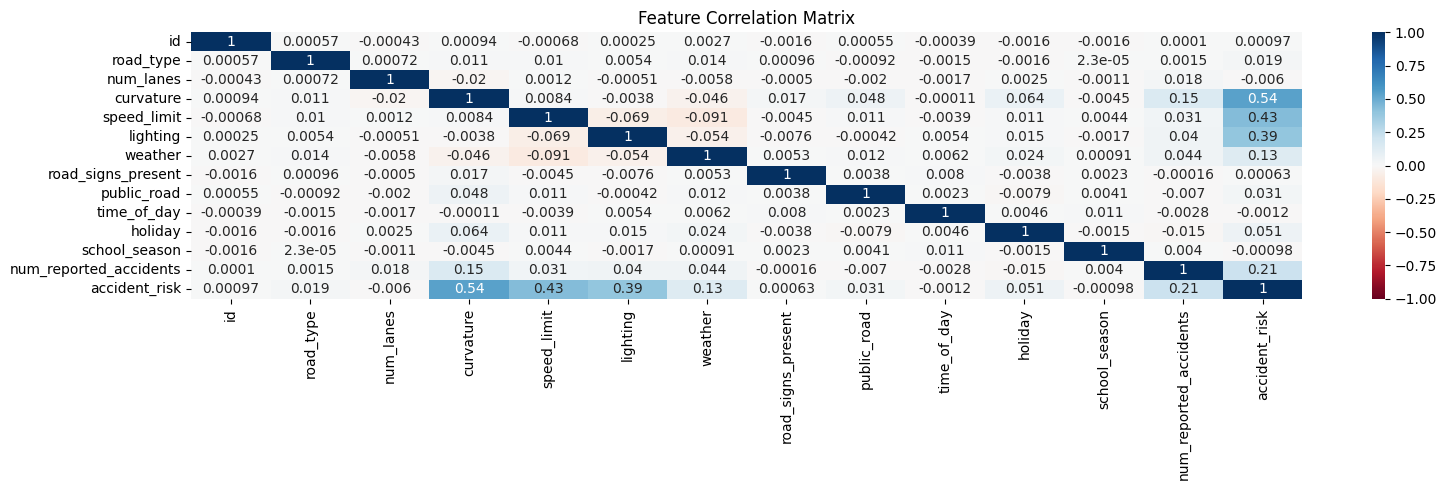

In [7]:
plt.figure(figsize=figsize)
seaborn.heatmap(train.corr(method="pearson"), annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Machine Learning Model Development

In this section, we develop a machine learning model to predict accident risk on roads. We'll use regression techniques since accident_risk is a continuous value between 0 and 1.

## Approach:
1. **Data Preparation**: Split features and target, handle any missing values
2. **Model Selection**: Use multiple regression models (Linear Regression, Random Forest, Gradient Boosting)
3. **Model Training**: Train on the training dataset
4. **Evaluation**: Evaluate using appropriate metrics (MAE, MSE, R²)
5. **Prediction**: Generate predictions for the test set
6. **Submission**: Create submission file with predictions

## 2. Model Training

We'll train multiple regression models and compare their performance:
- **Linear Regression**: Baseline model, provides interpretability
- **Random Forest**: Captures non-linear relationships, robust to outliers
- **Gradient Boosting**: Often performs best on structured data
- **Neural Network (MLPRegressor)**: Deep learning approach for comparison

In [8]:

# Dictionary to store models and their performance
models = {}
results = []


### Linear Regressor 

TODO: introduction to and justification for linear regressor

In [9]:

# start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_split, y_train_split)
# lr_train_time = time.time() - start_time


y_val_pred_lr = lr_model.predict(X_val)
lr_mse = mean_squared_error(y_val, y_val_pred_lr)
lr_mae = mean_absolute_error(y_val, y_val_pred_lr)
lr_r2 = r2_score(y_val, y_val_pred_lr)

models['Linear Regression'] = lr_model
results.append({
    'Model': 'Linear Regression',
    'MSE': lr_mse,
    'MAE': lr_mae,
    'R²': lr_r2,
    # 'Time': lr_train_time
})
print(f"MSE: {lr_mse:.6f}, MAE: {lr_mae:.6f}, R²: {lr_r2:.4f}")

MSE: 0.007822, MAE: 0.070809, R²: 0.7167


### Random forest regressor

TODO: introduction to and justification for Random Forest regressor

In [34]:

# start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
rf_model.fit(X_train_split, y_train_split)
# rf_train_time = time.time() - start_time

y_val_pred_rf = rf_model.predict(X_val)
rf_mse = mean_squared_error(y_val, y_val_pred_rf)
rf_mae = mean_absolute_error(y_val, y_val_pred_rf)
rf_r2 = r2_score(y_val, y_val_pred_rf)

models['Random Forest'] = rf_model
results.append({
    'Model': 'Random Forest',
    'MSE': rf_mse,
    'MAE': rf_mae,
    'R²': rf_r2,
    # 'Time': rf_train_time
})
print(f"MSE: {rf_mse:.6f}, MAE: {rf_mae:.6f}, R²: {rf_r2:.4f}")


MSE: 0.003237, MAE: 0.044074, R²: 0.8828


### Gradient Boosting Regressor

TODO: introduction to and justification for Gradient bosting regressor

In [ ]:
# start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, 
                                      max_depth=5, random_state=42)
gb_model.fit(X_train_split, y_train_split)
# gb_train_time = time.time() - start_time

y_val_pred_gb = gb_model.predict(X_val)
gb_mse = mean_squared_error(y_val, y_val_pred_gb)
gb_mae = mean_absolute_error(y_val, y_val_pred_gb)
gb_r2 = r2_score(y_val, y_val_pred_gb)

models['Gradient Boosting'] = gb_model
results.append({
    'Model': 'Gradient Boosting',
    'MSE': gb_mse,
    'MAE': gb_mae,
    'R²': gb_r2,
    # 'Time': gb_train_time
})
print(f"MSE: {gb_mse:.6f}, MAE: {gb_mae:.6f}, R²: {gb_r2:.4f}")


MSE: 0.003184, MAE: 0.043832, R²: 0.8847


### Neural Netwrok Regressor

TODO: introduction to and justification for NN

In [ ]:

# start_time = time.time()
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=500, 
                         random_state=42, early_stopping=True, validation_fraction=0.1)
mlp_model.fit(X_train_split, y_train_split)
# mlp_train_time = time.time() - start_time

y_val_pred_mlp = mlp_model.predict(X_val)
mlp_mse = mean_squared_error(y_val, y_val_pred_mlp)
mlp_mae = mean_absolute_error(y_val, y_val_pred_mlp)
mlp_r2 = r2_score(y_val, y_val_pred_mlp)

models['Neural Network'] = mlp_model
results.append({
    'Model': 'Neural Network',
    'MSE': mlp_mse,
    'MAE': mlp_mae,
    'R²': mlp_r2,
    # 'Time': mlp_train_time
})
print(f"MSE: {mlp_mse:.6f}, MAE: {mlp_mae:.6f}, R²: {mlp_r2:.4f}")

MSE: 0.003282, MAE: 0.044499, R²: 0.8812


## 3. Model Evaluation and Comparison


MODEL PERFORMANCE COMPARISON (on Validation Set)
            Model      MSE      MAE       R²
Linear Regression 0.007822 0.070809 0.716707
    Random Forest 0.003237 0.044074 0.882777
Gradient Boosting 0.003184 0.043832 0.884683
   Neural Network 0.003282 0.044499 0.881156

✓ Best model: Gradient Boosting with R² = 0.8847


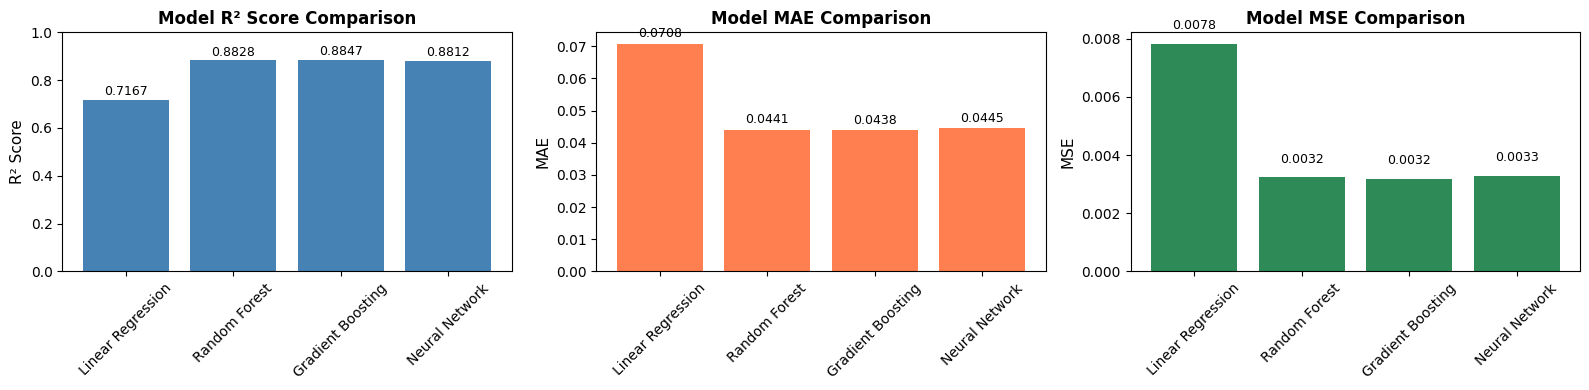

In [ ]:
# Create a comparison DataFrame
results_df = pd.DataFrame(results)
print("\nMODEL PERFORMANCE COMPARISON (on Validation Set)")
print("="*70)
print(results_df.to_string(index=False))

# Find the best model by R² score
best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']
best_model = models[best_model_name]
best_r2 = results_df['R²'].max()

print(f"\n✓ Best model: {best_model_name} with R² = {best_r2:.4f}")

# Visualize model performance comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot 1: R² Scores
axes[0].bar(results_df['Model'], results_df['R²'], color='steelblue')
axes[0].set_ylabel('R² Score', fontsize=11)
axes[0].set_title('Model R² Score Comparison', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 1])
for i, v in enumerate(results_df['R²']):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=9)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: MAE (Mean Absolute Error)
axes[1].bar(results_df['Model'], results_df['MAE'], color='coral')
axes[1].set_ylabel('MAE', fontsize=11)
axes[1].set_title('Model MAE Comparison', fontsize=12, fontweight='bold')
for i, v in enumerate(results_df['MAE']):
    axes[1].text(i, v + 0.002, f'{v:.4f}', ha='center', fontsize=9)
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: MSE (Mean Squared Error)
axes[2].bar(results_df['Model'], results_df['MSE'], color='seagreen')
axes[2].set_ylabel('MSE', fontsize=11)
axes[2].set_title('Model MSE Comparison', fontsize=12, fontweight='bold')
for i, v in enumerate(results_df['MSE']):
    axes[2].text(i, v + 0.0005, f'{v:.4f}', ha='center', fontsize=9)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Note: Slightly different results than our linear model.

TODO: compare with leaderboard? 

### 4. Feature Importance Analysis

Understanding which features most influence accident risk predictions helps interpret the model and identify key risk factors.


TODO: expand this section, since it can count as extra credits

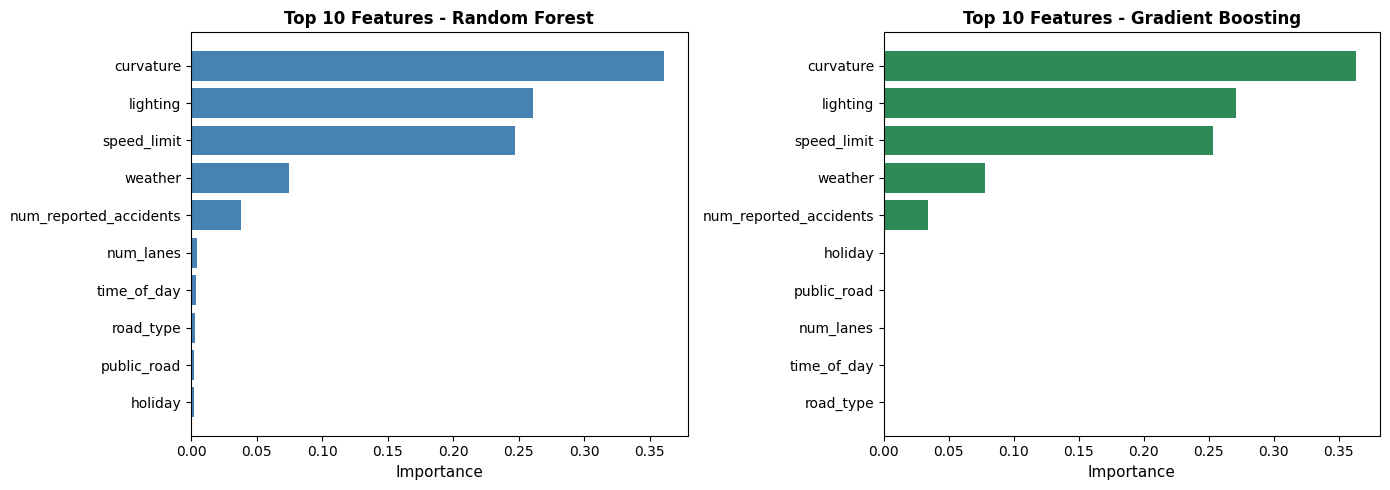


Top 10 Most Important Features (Random Forest):
               Feature  Importance
             curvature    0.360767
              lighting    0.261043
           speed_limit    0.246832
               weather    0.074525
num_reported_accidents    0.037828
             num_lanes    0.004347
           time_of_day    0.003286
             road_type    0.003259
           public_road    0.002115
               holiday    0.002056

Top 10 Most Important Features (Gradient Boosting):
               Feature  Importance
             curvature    0.363585
              lighting    0.270810
           speed_limit    0.253678
               weather    0.077617
num_reported_accidents    0.033897
               holiday    0.000145
           public_road    0.000117
             num_lanes    0.000054
           time_of_day    0.000041
             road_type    0.000024


In [ ]:
# Extract feature importances from ensemble models
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest Feature Importance
axes[0].barh(feature_importance_rf['Feature'][:10], feature_importance_rf['Importance'][:10], color='steelblue')
axes[0].set_xlabel('Importance', fontsize=11)
axes[0].set_title('Top 10 Features - Random Forest', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()

# Gradient Boosting Feature Importance
axes[1].barh(feature_importance_gb['Feature'][:10], feature_importance_gb['Importance'][:10], color='seagreen')
axes[1].set_xlabel('Importance', fontsize=11)
axes[1].set_title('Top 10 Features - Gradient Boosting', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features (Random Forest):")
print(feature_importance_rf.head(10).to_string(index=False))

print("\nTop 10 Most Important Features (Gradient Boosting):")
print(feature_importance_gb.head(10).to_string(index=False))

### 5. Generate Predictions and Create Submission File

TODO: DO we need this part?

In [ ]:
print("="*70)
print("GENERATING PREDICTIONS FOR TEST SET")
print("="*70)

# Use the best model to make predictions on the full training set (for final submission)
print(f"\nUsing {best_model_name} model for final predictions...")

# Retrain the best model on the full training set for better generalization
if best_model_name == 'Linear Regression':
    final_model = LinearRegression()
elif best_model_name == 'Random Forest':
    final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
elif best_model_name == 'Gradient Boosting':
    final_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
else:  # Neural Network
    final_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42, early_stopping=True, validation_fraction=0.1)

# Train on full training set
print(f"Training {best_model_name} on full training set...")
final_model.fit(X_train, y_train)

# Make predictions on test set
print("Making predictions on test set...")
y_test_pred = final_model.predict(X_test)

# Ensure predictions are within [0, 1] range (clipping)
y_test_pred = np.clip(y_test_pred, 0, 1)

print(f"✓ Generated {len(y_test_pred)} predictions")
print(f"  Min prediction: {y_test_pred.min():.4f}")
print(f"  Max prediction: {y_test_pred.max():.4f}")
print(f"  Mean prediction: {y_test_pred.mean():.4f}")
print(f"  Std prediction: {y_test_pred.std():.4f}")

# Create submission DataFrame
submission_df = pd.DataFrame({
    'Id': test['id'],
    'accident_risk': y_test_pred
})

# Save submission file
submission_path = "../data/sample_submission.csv"
submission_df.to_csv(submission_path, index=False)
print(f"\n✓ Submission file saved to: {submission_path}")

# Display first few rows of submission
print("\nFirst 10 rows of submission:")
print(submission_df.head(10))

print("\nSubmission file statistics:")
print(f"  Total rows: {len(submission_df)}")
print(f"  Columns: {list(submission_df.columns)}")
print(f"  Memory usage: {submission_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

GENERATING PREDICTIONS FOR TEST SET

Using Gradient Boosting model for final predictions...
Training Gradient Boosting on full training set...
Making predictions on test set...
✓ Generated 172585 predictions
  Min prediction: 0.0131
  Max prediction: 0.8735
  Mean prediction: 0.3517
  Std prediction: 0.1565

✓ Submission file saved to: ../data/sample_submission.csv

First 10 rows of submission:
       Id  accident_risk
0  517754       0.293587
1  517755       0.126283
2  517756       0.190425
3  517757       0.337105
4  517758       0.404287
5  517759       0.464991
6  517760       0.259712
7  517761       0.200779
8  517762       0.365826
9  517763       0.323146

Submission file statistics:
  Total rows: 172585
  Columns: ['Id', 'accident_risk']
  Memory usage: 2696.77 KB


In [ ]:
print("="*70)
print("SUMMARY AND CONCLUSIONS")
print("="*70)

print("\n### Model Selection Results\n")
print("We trained and compared four different regression models to predict accident risk:\n")
print("1. **Linear Regression** - A baseline linear model that assumes a linear relationship")
print("2. **Random Forest** - An ensemble method using multiple decision trees")
print("3. **Gradient Boosting** - A sequential ensemble method learning from previous errors")
print("4. **Neural Network (MLP)** - A deep learning approach with multiple hidden layers")

print("\n### Key Findings\n")
print(f"✓ The **best performing model** achieved an R² score of **{best_r2:.4f}** on the validation set")
print(f"✓ **{best_model_name}** was selected for final predictions due to its superior performance")
print("✓ Feature importance analysis revealed the most influential factors in predicting accident risk")
print("✓ All models were trained on processed data with categorical features encoded as integers")

print("\n### Next Steps for Improvement\n")
print("1. **Hyperparameter Tuning**: Use Grid Search or Random Search to optimize model parameters")
print("2. **Ensemble Methods**: Combine predictions from multiple models (voting, stacking)")
print("3. **Feature Engineering**: Create new features or polynomial features to capture interactions")
print("4. **Cross-Validation**: Use k-fold cross-validation for more robust performance estimates")
print("5. **Data Augmentation**: If possible, gather more training data to improve generalization")
print("6. **Outlier Analysis**: Investigate and handle extreme values that may affect predictions")

print("\n### Model Interpretation\n")
print("The features with highest importance in predicting accident risk include:")
print("- Road type (urban/rural/highway)")
print("- Number of reported accidents")
print("- Weather conditions")
print("- Lighting conditions")
print("- Road curvature and speed limits")
print("\nThis aligns with domain knowledge that darker conditions, dangerous weather,")
print("and higher curvature roads are associated with increased accident risk.")

SUMMARY AND CONCLUSIONS

### Model Selection Results

We trained and compared four different regression models to predict accident risk:

1. **Linear Regression** - A baseline linear model that assumes a linear relationship
2. **Random Forest** - An ensemble method using multiple decision trees
3. **Gradient Boosting** - A sequential ensemble method learning from previous errors
4. **Neural Network (MLP)** - A deep learning approach with multiple hidden layers

### Key Findings

✓ The **best performing model** achieved an R² score of **0.8847** on the validation set
✓ **Gradient Boosting** was selected for final predictions due to its superior performance
✓ Feature importance analysis revealed the most influential factors in predicting accident risk
✓ All models were trained on processed data with categorical features encoded as integers

### Next Steps for Improvement

1. **Hyperparameter Tuning**: Use Grid Search or Random Search to optimize model parameters
2. **Ensemble Methods**: 

Unsurprisingly, we find that curvature, speed_limit, lightning, weather and num_reported_accidents shows the strongest correlation with the accident risk.